In [2]:
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
#from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import os
import json
import pandas as pd
import numpy as np
import gensim.models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Dense, Flatten, MaxPool1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

In [5]:
#coucou
import pandas as pd
#import strings

In [6]:
USERNAME='clairemalbrel'

In [1]:
USERNAME='clairemalbrel'
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd


def get_data(nrows):
    path1=f'/Users/{USERNAME}/code/{USERNAME}/STOCK_PREDICT/data/datasets-129-792900-upload_DJIA_table.csv'
    path2=f'/Users/{USERNAME}/code/{USERNAME}/STOCK_PREDICT/data/Combined_News_DJIA.csv'
    df_djia = pd.read_csv(path1, nrows=nrows)
    df_news = pd.read_csv(path2,nrows=nrows)
    return df_djia, df_news

def merge_df():
    #merge dataset
    df_news['Date'] = pd.to_datetime(df_news['Date'])
    df_djia['Date'] = pd.to_datetime(df_djia['Date'])
    df = df_news.merge(df_djia)
    return df

def get_features(df):
    # get percentage change
    df['change'] = df['Open'].pct_change()
    # remove first row
    df['change'] = df['change'].shift(-1)
    return df

def categorical(x):
    if x > 0:
        x = 1
    else:
        x = 0
    return x

def get_cat_data(df):
    df['target'] = df['change'].apply(categorical)
    return df

def group_news(df):
    # Combine the top 25 daily news into 1 column
    cols = df.columns[2:]
    df['combined'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
    return df

def clean(text):
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for punctuation in punctuation:
        review1 = text.replace(punctuation, ' ') # Remove Punctuation

    lowercased = text.lower() # Lower Case
    without_b=text.replace(" b ","")
    without_b=text.replace("b'","")
    without_b=text.replace('b"',"")
    tokenized = word_tokenize(without_b) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    lemma=WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    return " ".join(lemmatized)

In [2]:
df_djia, df_news = get_data(1989)

In [9]:
#df_news['Date'] = pd.to_datetime(df_news['Date'])
#df_djia['Date'] = pd.to_datetime(df_djia['Date'])

In [10]:
df=merge_df()

In [11]:
df=get_features(df)

In [12]:
df=get_cat_data(df)

In [13]:
df=group_news(df)

In [14]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top25,Open,High,Low,Close,Volume,Adj Close,change,target,combined
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.026030,1,"b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.004436,1,b'Why wont America and Nato help us? If they w...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-0.012637,0,b'Remember that adorable 9-year-old who sang a...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-0.008660,0,b' U.S. refuses Israel weapons to attack Iran:...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.006863,1,b'All the experts admit that we should legalis...


In [15]:
df['cleaned'] = df['combined'].apply(clean)

In [17]:

if __name__ == '__main__':
    df_djia, df_news = get_data(1989)
    #df_djia = get_data(github_username, nrows=100)
    #df_news = get_data(github_username, nrows=100)
    df=merge_df()
    df=get_features(df)
    df=get_cat_data(df)
    df=group_news(df)
    df['cleaned'] = df['combined'].apply(clean)
    print('df all cleaned and ready')
    print(df.shape)


df all cleaned and ready
(1989, 37)


In [18]:
import sys
sys.path.append('../')
from STOCK_PREDICT.df import get_data

In [85]:
df_one=df[df['target']==1]
df_zero=df[df['target']==0]

In [86]:
#HAUSSE
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.9,min_df = 0.001,ngram_range = (3,3)).fit(df_one['cleaned'])

data_vectorized = vectorizer.transform(df_one['cleaned'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)



Topic 0:
[('human right activist', 5.985607545637697), ('founder julian assange', 5.2482443131592085), ('osama bin laden', 4.928202605422309), ('nuclear power plant', 4.873737968432674), ('president vladimir putin', 4.279130669776184), ('human rights watch', 4.0762332481149945), ('great barrier reef', 4.028465228524279), ('chancellor angela merkel', 3.163453157880118), ('kim jong il', 3.137403738832889), ('british prime minister', 3.1106720216537544)]
Topic 1:
[('nobel peace prize', 5.508645659612301), ('south china sea', 4.09186443941101), ('president hosni mubarak', 3.903643996445916), ('human rights watch', 3.291512484056631), ('year old girl', 3.034094208521032), ('president hamid karzai', 2.8998791088207154), ('eu member state', 2.6194112373381), ('police arrested people', 2.6164810674910752), ('supreme court rule', 2.5799351980035623), ('alleged war crime', 2.5448204758975854)]
Topic 2:
[('new york times', 3.916130240062249), ('papua new guinea', 3.738684321429761), ('world war i

In [87]:
#BAISSE
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.9,min_df = 0.001,ngram_range = (3,3)).fit(df_zero['cleaned'])

data_vectorized = vectorizer.transform(df_zero['cleaned'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)



Topic 0:
[('president vladimir putin', 0.9019008663770742), ('osama bin laden', 0.7666067783163327), ('face year jail', 0.688958070614992), ('female genital mutilation', 0.685194349627161), ('chancellor angela merkel', 0.6833795592430009), ('leader kim jong', 0.6697671151200033), ('international space station', 0.6669063496931531), ('kim jong il', 0.6282967736503561), ('fukushima nuclear plant', 0.6260522101496027), ('nuclear power plant', 0.6240951461809057)]
Topic 1:
[('san suu kyi', 0.6985092147621766), ('founder julian assange', 0.6821993264794363), ('great barrier reef', 0.6759571309145025), ('human right abuse', 0.6727662583278617), ('international criminal court', 0.6693006137264752), ('nobel peace prize', 0.6623499143140472), ('human rights watch', 0.6297638968873898), ('human right group', 0.6206091175651667), ('anders behring breivik', 0.605089396742748), ('aung san suu', 0.604441465574167)]
Topic 2:
[('osama bin laden', 0.9222182243725725), ('nuclear power plant', 0.72853451

## test with only first news 

In [88]:
df_one['clean_first_news'] = df['Top1'].apply(clean)

/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
df_zero['clean_first_news'] = df['Top1'].apply(clean)

/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
df_zero

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,High,Low,Close,Volume,Adj Close,change,target,combined,cleaned,clean_first_news
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-0.012637,0,b'Remember that adorable 9-year-old who sang a...,adorable sang opening ceremony That fake Georg...,adorable sang opening ceremony That fake
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-0.008660,0,b' U.S. refuses Israel weapons to attack Iran:...,b refuse Israel weapon attack Iran president o...,b refuse Israel weapon attack Iran report
6,2008-08-18,0,"b'In an Afghan prison, the majority of female ...","b""Little girl, you're not ugly; they are""","b""Pakistan's Musharraf to Resign, Leave the Co...","b'Tornado throws a bus in Poland, captured by ...","b""Britain's terror laws have left me and my fa...","b""Iran 'fires satellite into space'""",b'Rights of Non-Muslims restricted by new Mald...,b'Tour of Tskhinvali undercuts Russian version...,...,11690.429688,11434.120117,11479.389648,156290000,11479.389648,-0.015572,0,"b'In an Afghan prison, the majority of female ...",Afghan prison majority female prisoner serving...,Afghan prison majority female prisoner serving...
7,2008-08-19,0,"b""Man arrested and locked up for five hours af...",b'The US missile defence system is the magic p...,b'Schrder lambasted for blaming Russian confli...,b'Officials: 10 French soldiers killed near Ka...,b'These ten laws make China a totalitarian was...,b'Russia seizes US vehicles',"b""Muslims are only 4% of Denmark's 5.4 million...",b'Taliban Forces Kill 10 French Soldiers and R...,...,11478.169922,11318.500000,11348.549805,171580000,11348.549805,-0.011513,0,"b""Man arrested and locked up for five hours af...",Man arrested locked five hour taking photo pol...,Man arrested locked five hour taking photo pol...
11,2008-08-25,0,"b""N Korea's Kim died in 2003; replaced by look...",b'Secret prison on Diego Garcia confirmed',b'Israel claims allowing an aid ship to reach ...,b'Pedophile attempts to assault and kidnap chi...,"b'Wealthy Mexicans, terrified of soaring kidna...","b'""If the weapon states are not prepared to ri...",b'Israeli Report: Guards regularly abuse inmates',"b""Flashback: Naked, drunk, surrounded by sex t...",...,11626.269531,11362.629883,11386.250000,148610000,11386.250000,-0.020869,0,"b""N Korea's Kim died in 2003; replaced by look...",N Korea Kim died replaced lookalike say Waseda...,N Korea Kim died replaced lookalike say Waseda...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2016-06-14,0,Gay Chinese man sues mental hospital for tryin...,Goldman Sachs hired prostitutes to win Libyan ...,'Man holed up in Paris suburban home with host...,A group of Pakistani clerics has issued a fatw...,Animal Welfare Institute Report: Norway is now...,ISIS leader al-Baghdadi killed in air strike: ...,Leaked secret audio recordings of Brazils most...,US with 5 percent of the world's population ha...,...,17733.919922,17595.789062,17674.820312,93740000,17674.820312,-0.000402,0,Gay Chinese man sues mental hospital for tryin...,Gay Chinese man sue mental hospital trying cu

In [91]:
#HAUSSE
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.9,min_df = 0.001,ngram_range = (3,3)).fit(df_one['clean_first_news'])

data_vectorized = vectorizer.transform(df_one['clean_first_news'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)



Topic 0:
[('qatar world cup', 2.713082734736737), ('recognizes armenian genocide', 2.3288579746408926), ('wikileaks julian assange', 2.328857970349311), ('mexican drug cartel', 2.3288579062383037), ('world cup worker', 2.051467944624381), ('supreme court rule', 2.036504873518927), ('nobel peace prize', 2.036504871790499), ('fundamental human right', 1.7444110349895097), ('rape victim sentenced', 1.3390322914915742), ('football world cup', 1.0680410268062532)]
Topic 1:
[('female genital mutilation', 3.328845736129848), ('policy united states', 2.328714211382257), ('palestinians west bank', 2.328714195116517), ('democratic republic congo', 2.3287141629479566), ('human rights watch', 2.3287141033974437), ('sex outside marriage', 2.0357765483654435), ('founder julian assange', 1.7443047148088027), ('wikileaks founder julian', 1.7443047148088024), ('football world cup', 1.3167758777189504), ('rape victim sentenced', 1.0308676770184593)]
Topic 2:
[('world health organization', 3.327870332126

In [92]:
#BAISSE
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.9,min_df = 0.001,ngram_range = (3,3)).fit(df_zero['clean_first_news'])

data_vectorized = vectorizer.transform(df_zero['clean_first_news'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)



Topic 0:
[('prime minister australia', 1.352284801426854), ('apologize armenian massacre', 1.3280824329534342), ('text tpp released', 1.3280824185463926), ('anonymous message nato', 1.3280824178963493), ('navy sail venezuela', 1.3280824129640505), ('turkey ban youtube', 1.3280824099638258), ('worst luck card', 1.3280824026490834), ('ca nice thing', 1.3280823842856504), ('malaria vaccine discovered', 1.328082370367443), ('pirate bay founder', 1.0935796245462652)]
Topic 1:
[('effective vaccine malaria', 1.3279929310311571), ('unesco palestinians membership', 1.3279929196407794), ('korea woman president', 1.3279928947846127), ('bin laden dead', 1.3279928524622424), ('imf fear explosion', 1.3279928518093784), ('canada officially recession', 1.3279928245434152), ('huge explosion downtown', 1.0366391964745496), ('explosion downtown oslo', 1.0366391964745494), ('fired parliament canada', 1.0366391820701497), ('shots fired parliament', 1.0366391820701497)]
Topic 2:
[('riot breaking egypt', 1.3

## TOP 3

In [93]:
df_one['clean_second_news'] = df_one['Top2'].apply(clean)
df_one['clean_third_news'] = df_one['Top3'].apply(clean)

/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
df_zero['clean_second_news'] = df_zero['Top2'].apply(clean)
df_zero['clean_third_news'] = df_zero['Top3'].apply(clean)

/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [96]:
df_one['top_three_clean']= df_one.iloc[:,37:40].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
df_zero['top_three_clean']= df_zero.iloc[:,37:40].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [161]:
#HAUSSE
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.7,min_df = 0.1,ngram_range = (3,3)).fit(df_one['top_three_clean'])

data_vectorized = vectorizer.transform(df_one['top_three_clean'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)




ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [99]:
#BAISSE
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.9,min_df = 0.01,ngram_range = (1,2)).fit(df_zero['top_three_clean'])

data_vectorized = vectorizer.transform(df_zero['top_three_clean'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)




Topic 0:
[('president', 10.266096710655429), ('drug', 9.148845913802843), ('international', 7.304059481975993), ('government', 7.044774711622906), ('world', 6.566129358625247), ('say', 6.520974142194948), ('new', 6.508755421995528), ('wikileaks', 5.959351336082901), ('mexico', 5.929862024996813), ('bank', 5.854465073853938)]
Topic 1:
[('world', 15.172762196213776), ('say', 14.069388556881234), ('korea', 13.73447242225919), ('new', 13.323131474358368), ('people', 12.797524084722728), ('government', 12.715452717245764), ('saudi', 12.573275358503558), ('north', 12.290676200181034), ('russia', 12.045089336335018), ('law', 11.640909237980434)]
Topic 2:
[('israel', 13.126116374626227), ('year', 11.060635758553333), ('israeli', 9.789571880313705), ('police', 9.165259856910131), ('iran', 8.300896774606557), ('woman', 7.727206312361116), ('child', 7.495885078997379), ('gaza', 7.204845723927126), ('girl', 7.176738746293282), ('shot', 6.9669433144713135)]


In [100]:
# regarder corelation entre mot et hausse
# faire 4 classes hausse et baisse -- séparer les augmentations en 5 classes 


#attention au data leak@


In [101]:
print(df['change'].min())
print(df['change'].max())

-0.07792701766017796
0.10948993473973356


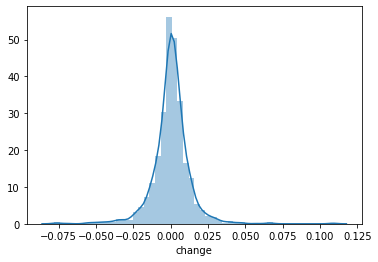

In [102]:
import seaborn as sns
sns.distplot(df['change'])

# plus de -0.025 & plus de 0.025

# forte hausse 

In [103]:
df_big=df.loc[(df['change'] > 0.025)]

In [132]:
df_big

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,High,Low,Close,Volume,Adj Close,change,target,combined,cleaned,clean_first_news
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.026030,1,"b""Georgia 'downs two Russian warplanes' as cou...",Georgia two Russian warplane country move brin...,Georgia two Russian warplane country move brin...
20,2008-09-08,1,b'A French judge has ordered two branches of S...,b' Russia in legal bid to ban South Park',"b""'60 Minutes' Cut Ahmadinejad's Statement, 'S...",b'U.S. drones kill 13 in missile attack in Pak...,"b'Screw You, TSA: No Conviction on Key Charges...",b'Scientology on trial for fraud in France!',b'An EU ban on ads with sexist overtones? Anot...,b'Film Backs Afghans Claims of US Killings [of...,...,11570.660156,11224.790039,11510.740234,273000000,11510.740234,0.025823,1,b'A French judge has ordered two branches of S...,b A French judge ordered two branch Scientolog...,b A French judge ordered two branch Scientolog...
28,2008-09-18,1,"b'6,200 babies sick: Milk scandal spreading '",b'Afghan farmers are pulling up poppies for wh...,b'Venezuela Says U.S. Uses Anti-Drug List as W...,b'6 more people die in another US missile stri...,b'U.S. may use Georgian air bases to strike at...,b'Russia may sell more air defense systems to ...,b'Russian President Threatens Arctic Annexation',b'China accuses US of financial Weapon of Mass...,...,11076.440430,10459.440430,11019.690430,488060000,11019.690430,0.039448,1,"b'6,200 babies sick: Milk scandal spreading '_...",b baby sick Milk scandal spreading farmer pull...,b baby sick Milk scandal spreading
29,2008-09-19,1,b'Brits take a stand - ban short-selling of fi...,b'Scientology could be banned in France if the...,"b""Spain's media in uproar over McCain's commen...","b""Arabs across the ideological spectrum are de...",b' Bitter Asians wag the finger at U.S. bank b...,"b""Rome's Ban On Skimpy Clothing Leads Prostitu...","b""UCLA study of satellite imagery casts doubt ...",b'China Blames Wall Street Meltdown On Federal...,...,11483.049805,11026.700195,11388.440430,655110000,11388.440430,0.033272,1,b'Brits take a stand - ban short-selling of fi...,take stand ban financial could banned France l...,take stand ban financial stock
36,2008-09-30,1,b'Gorbachev forms new Russian party opposing P...,"b""Ahmadinijad's willingness to accept Israel -...","b""Olmert Says Israel Must Withdraw From 'Almos...","b""Mexican Violence Forcing Families to Migrate...",b'America Loses Its Dominant Economic Role',b'French Muslims Find Haven in Catholic Schools ',"b""Meanwhile There's A War Going On... Remember...",b'Scores die in India temple crush',...,10868.900391,10371.419922,10850.660156,319770000,10850.660156,0.045877,1,b'Gorbachev forms new Russian party opposing P...,form new Russian party opposing willingness ac...,form new Russian party opposing Putin
45,2008-10-13,1,b'EU Bans the Incandescent Light Bulb',b'AFP: Paul Krugman wins Nobel Economics Prize',"b'Europe to U.S.: You messed up the rescue, too'",b'Hindu Threat to Christians: Convert or Flee',"b'Europe puts $2.3 trillion on line for banks,...",b'Congratulations on your Nobel Prize in Econo...,"b""When can we get some damn privacy? Governmen...",b'AFRICA: Sexually-transmitted grades kills qu...,...,9427.990234,8462.179688,9387.610352,399290000,9387.610352,0.109490,1,b'EU Bans the Incandescent Light Bulb'_b'AFP: ...,Bans Incandescent Light Paul Krugman win Nobel...,Bans Incandescent Light Bulb
48,2008-10-16,1,b'Iceland has food stocks for about 3 to 5 weeks',b'Israeli Bestseller B

##toutes les news 

In [166]:
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.9,min_df = 0.01,ngram_range = (3,3)).fit(df_big['cleaned'])

data_vectorized = vectorizer.transform(df_big['cleaned'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('korea preparing restart', 0.5050401464303528), ('preparing restart nuclear', 0.5050401464303528), ('ship actually thai', 0.49193333129656225), ('trawler owner say', 0.49193333129656225), ('actually thai trawler', 0.49193333129656225), ('thai trawler owner', 0.49193333129656225), ('year old boy', 0.47523167355836277), ('south ossetia russia', 0.47508635503713437), ('georgia invades south', 0.47508635503713437), ('invades south ossetia', 0.47508635503713437)]
Topic 1:
[('die india temple', 0.5176655369340664), ('sign cluster bomb', 0.48072744611940355), ('nobel peace prize', 0.4572016468076612), ('iraq die india', 0.4253126323043166), ('america help moderate', 0.4253126323043166), ('temple somalian pirate', 0.4253126323043166), ('ukranian carrying wmd', 0.4253126323043166), ('gurkhas win right', 0.4253126323043166), ('temple stampede farm', 0.4253126323043166), ('temple western india', 0.4253126323043166)]
Topic 2:
[('argentina wanted alleged', 0.4831694808413052), ('wanted a

# forte baisse

In [107]:
df_low=df.loc[(df['change'] < -0.025)]

In [109]:
df_low.shape

(53, 37)

## toutes les news


In [168]:
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.9,min_df = 0.001,ngram_range = (3,3)).fit(df_low['cleaned'])

data_vectorized = vectorizer.transform(df_low['cleaned'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('consider sea bandit', 0.5110845829150341), ('british film crew', 0.499485415558657), ('fury die attack', 0.49557674985761146), ('die attack soil', 0.49557674985761146), ('reacts fury die', 0.49557674985761146), ('build nuclear reactor', 0.4930190150009933), ('saddam weapon bluff', 0.4857971794085525), ('say saddam weapon', 0.4857971794085525), ('weapon bluff aimed', 0.4857971794085525), ('vote leave european', 0.47575275815075213)]
Topic 1:
[('minutes crew attacked', 0.4867205375547134), ('politician deleted tweet', 0.4700246092578958), ('russian spy ring', 0.4693862433825444), ('electronic waste stolen', 0.45995558439370016), ('europes electronic waste', 0.45995558439370016), ('waste stolen mismanaged', 0.45995558439370016), ('korea raise watchcon', 0.4499721881552524), ('atlas real world', 0.414867698133789), ('vorratsdatenspeicherung approves indian', 0.414867698133789), ('june united nations', 0.414867698133789)]
Topic 2:
[('missile strike kill', 0.518439799837235), ('s

# only top


In [118]:
df_big['clean_first_news'] = df_big['Top1'].apply(clean)
df_low['clean_first_news'] = df_low['Top1'].apply(clean)

/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [136]:
#big
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.8,min_df = 0.01,ngram_range = (1,2)).fit(df_big['clean_first_news'])

data_vectorized = vectorizer.transform(df_big['clean_first_news'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('leader', 0.9557313953576441), ('african aid', 0.9258279229081678), ('african', 0.9258279229081678), ('mumbai', 0.9208247955230706), ('london', 0.87838595117976), ('police', 0.8746643021350258), ('aid', 0.8685834049508099), ('spreading', 0.8197595245216756), ('world', 0.8193612499792821), ('mumbai blasts', 0.7864057190993714)]
Topic 1:
[('russian', 0.8896555933698609), ('chinese', 0.8658084522471432), ('guantanamo', 0.8245084347059539), ('new', 0.8126080060373333), ('girl deaf', 0.7955789118566446), ('deaf', 0.7955789118566446), ('chinese girl', 0.7955789118566446), ('declares', 0.7781621042076007), ('declares holiday', 0.7781621042076007), ('holiday', 0.7781621042076007)]
Topic 2:
[('stock', 1.107170737089589), ('ban', 1.0465094157901662), ('army', 0.8470309042715976), ('private', 0.8194788244435429), ('financial', 0.8172425895836706), ('stock week', 0.786803009829582), ('week', 0.786803009829582), ('food stock', 0.786803009829582), ('food', 0.786803009829582), ('bangkok', 

In [129]:
#low
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.7,min_df = 0.01,ngram_range = (1,2)).fit(df_low['clean_first_news'])

data_vectorized = vectorizer.transform(df_low['clean_first_news'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('canada', 1.1989973942839411), ('bbc', 0.9657059233947265), ('britain', 0.8178578675432243), ('turkish', 0.8033081533523784), ('museum', 0.7945200617061221), ('canada officially', 0.7918609159491881), ('officially', 0.7918609159491881), ('officially recession', 0.7918609159491881), ('recession', 0.7918609159491881), ('gaza', 0.7913382839373353)]
Topic 1:
[('end', 0.9786951859323598), ('say', 0.9346342533096914), ('beginning', 0.8641445667130458), ('sail venezuela', 0.7865004440763141), ('venezuela', 0.7865004440763141), ('navy sail', 0.7865004440763141), ('sail', 0.7865004440763141), ('scientology viral', 0.778274893783102), ('scientology', 0.778274893783102), ('viral', 0.778274893783102)]
Topic 2:
[('leader', 0.9579003153827432), ('pirate', 0.9076115183537248), ('lied pirate', 0.9076115183537248), ('lied', 0.9076115183537248), ('meeting', 0.8127158578638152), ('try', 0.7832129179059524), ('id', 0.7760887127165746), ('student', 0.7734412137441886), ('card', 0.732963627858462

In [138]:
df_big['clean_second_news'] = df_big['Top2'].apply(clean)
df_low['clean_second_news'] = df_low['Top2'].apply(clean)
df_big['clean_third_news'] = df_big['Top3'].apply(clean)
df_low['clean_third_news'] = df_low['Top3'].apply(clean)

/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [141]:
df_big['top_three_clean']= df_big.iloc[:,37:40].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
df_low['top_three_clean']= df_low.iloc[:,37:40].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/clairemalbrel/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [162]:
#big
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.7,min_df = 0.1,ngram_range = (1,2)).fit(df_big['top_three_clean'])

data_vectorized = vectorizer.transform(df_big['top_three_clean'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('police', 5.863415926590423), ('party', 4.486032465426012), ('dead', 3.9424016662476946), ('uk', 0.3744881146034351), ('israel', 0.3556849661921694), ('london', 0.3456171212842948), ('new', 0.34496767601390604), ('say', 0.34458223566484514), ('gaza', 0.33877329135144857), ('palestinian', 0.335399678054067)]
Topic 1:
[('palestinian', 4.293966888759876), ('israel', 4.2896399329864705), ('gaza', 3.7679890874157898), ('say', 3.069355140054774), ('new', 0.41655911016707753), ('party', 0.35387526942360875), ('police', 0.3475358452878889), ('london', 0.33819651077254653), ('dead', 0.3365664947709241), ('uk', 0.336135351164217)]
Topic 2:
[('uk', 5.396316123128474), ('new', 4.031124954854463), ('london', 4.02470900991488), ('say', 1.3110333024712058), ('police', 0.4560833932722326), ('dead', 0.3787336234020336), ('israel', 0.35746122993280677), ('party', 0.3399115539703824), ('gaza', 0.3368843632652952), ('palestinian', 0.33678364726156557)]


In [163]:
#low
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.7,min_df = 0.1,ngram_range = (1,2)).fit(df_low['top_three_clean'])

data_vectorized = vectorizer.transform(df_low['top_three_clean'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('say', 6.108551779713595), ('war', 5.989647581677804), ('israel', 5.8954496393675875), ('police', 4.738158988452696), ('israeli', 4.159336104799047), ('gaza', 2.2816881667743667), ('million', 0.36021606113185495), ('country', 0.35343414319973865), ('world', 0.35175736721262635), ('government', 0.348903111755948)]
Topic 1:
[('china', 5.191397899402422), ('right', 5.120712359995519), ('million', 4.384470099427048), ('gaza', 3.158339570361392), ('world', 0.38208877713732126), ('say', 0.3601958798970102), ('country', 0.34435372520333474), ('people', 0.34420414819666084), ('israeli', 0.34239356498754636), ('israel', 0.3407165701672164)]
Topic 2:
[('world', 4.704290931451675), ('country', 4.553545592505342), ('year', 4.418141228778137), ('government', 4.406721420413203), ('people', 4.167867426672119), ('say', 0.39148815283829996), ('war', 0.36907789249495454), ('israel', 0.36426358482525556), ('police', 0.3557168514674094), ('china', 0.35364812915246147)]


#term frequency

In [151]:
count_big = (df_big['top_three_clean']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
count_big.columns = ['words','tf']
count_big.sort_values('tf', ascending=False).head(10)

,words,tf
195,US,11.0
413,I,8.0
72,Israel,8.0
163,UK,8.0
160,London,7.0
361,The,7.0
259,police,6.0
686,national,6.0
19,b,6.0
58,take,6.0


In [165]:
count_low = (df_low['top_three_clean']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
count_low.columns = ['words','tf']
count_low.sort_values('tf', ascending=False).head(10)

,words,tf
31,The,15.0
34,b,11.0
17,Israel,11.0
16,say,11.0
458,Gaza,8.0
22,country,8.0
30,year,8.0
566,Israeli,8.0
325,It,7.0
131,China,7.0


# same but for all 1 // 0 with top 3

In [164]:
count_zero = (df_zero['top_three_clean']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
count_zero.columns = ['words','tf']
count_zero.sort_values('tf', ascending=False).head(20)

,words,tf
196,The,317.0
83,say,171.0
71,US,167.0
195,year,140.0
137,A,127.0
419,government,122.0
491,people,111.0
212,world,109.0
187,country,107.0
68,police,101.0


In [159]:
count_one = (df_one['top_three_clean']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
count_one.columns = ['words','tf']
count_one.sort_values('tf', ascending=False).head(20)

,words,tf
76,The,327.0
179,US,183.0
285,A,176.0
157,say,176.0
113,year,170.0
83,government,121.0
261,people,119.0
566,world,113.0
579,police,106.0
728,I,103.0


# pas de hausse/baisse


In [170]:
df['clean_first_news'] = df['Top1'].apply(clean)

In [176]:

from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.87,min_df = 0.001,ngram_range = (2,2)).fit(df['clean_first_news'])

data_vectorized = vectorizer.transform(df['clean_first_news'])

lda_model = LatentDirichletAllocation(n_components=2).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('saudi arabia', 14.394969109383098), ('edward snowden', 10.385348665883166), ('new zealand', 10.279634463308586), ('david cameron', 9.57933416407984), ('year old', 9.5423743063014), ('united states', 9.093899575506727), ('pope francis', 7.798982385293926), ('north korean', 6.723293436202816), ('climate change', 6.082974395698661), ('united nations', 5.845222856977235)]
Topic 1:
[('north korea', 23.70818559330945), ('human right', 12.296334093064573), ('prime minister', 12.14179256723999), ('world cup', 11.906603189470205), ('julian assange', 10.238765474201449), ('pirate bay', 9.096509999447958), ('police officer', 8.534066914912058), ('south korea', 8.21039770388209), ('war crime', 7.119349162071001), ('supreme court', 6.507133416123564)]


In [179]:
df['clean_second_news'] = df['Top2'].apply(clean)
df['clean_third_news'] = df['Top3'].apply(clean)

In [180]:
df.iloc[:,37:40]

,clean_first_news,clean_second_news,clean_third_news
0,Georgia two Russian warplane country move brin...,Musharraf impeached,Today Columns troop roll South Ossetia footage...
1,wont America Nato help u If wont help u help Iraq,put foot Georgian conflict,Jewish Georgian minister Thanks Israeli traini...
2,adorable sang opening ceremony That fake,Russia Georgia operation,b If sexual harassment would child
3,b refuse Israel weapon attack Iran report,When president ordered attack Tskhinvali capit...,b Israel clear troop killed Reuters cameraman
4,expert admit legalise drug,South Osetia picture made Russian soldier,wrestler Ara Abrahamian throw away medal Olymp...
...,...,...,...
1984,Barclays RBS share suspended trading tanking,Pope say Church ask forgiveness gay past treat...,Poland xenophobic abuse Poles UK
1985,Scientists To Australia If You Want To Save Th...,The personal detail French police officer uplo...,S amp P cut United Kingdom sovereign credit ra...
1986,Explosion At Airport In Istanbul,Yemeni former president Terrorism offspring Wa...,UK must accept freedom movement access EU Market
1987,Jamaica proposes marijuana dispenser tourist a...,Stephen Hawking say pollution still biggest th...,Boris Johnson say run Tory party leadership


In [181]:
df['top_three_clean']= df.iloc[:,37:40].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

In [183]:
df_changes=df.loc[(df['change'] < -0.025)|(df['change'] > 0.025) ]

In [186]:
#all
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.7,min_df = 0.01,ngram_range = (2,2)).fit(df_changes['top_three_clean'])

data_vectorized = vectorizer.transform(df_changes['top_three_clean'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('carrying people', 0.7444419423959265), ('war crime', 0.7375155532254403), ('soldier shoot', 0.7174247581748304), ('shoot dead', 0.7174247581748304), ('buy version', 0.7170172874747882), ('chinese officer', 0.6973277575660826), ('prime minister', 0.6964838483066733), ('gaza say', 0.6794668517082332), ('political party', 0.6619404236654883), ('offensive gaza', 0.6543721487843794)]
Topic 1:
[('tie cuba', 0.7192587952948382), ('security state', 0.6581845972340217), ('saddam hussein', 0.638675157902401), ('light bulb', 0.6332365596353376), ('economics prize', 0.6332365596353376), ('bulb paul', 0.6332365596353376), ('messed rescue', 0.6332365596353376), ('prize messed', 0.6332365596353376), ('bans incandescent', 0.6332365596353376), ('krugman win', 0.6332365596353376)]
Topic 2:
[('drug adviser', 0.7851494934267), ('id card', 0.6922521436843829), ('consider sea', 0.680354723773249), ('sea bandit', 0.680354723773249), ('london riot', 0.6611256861408569), ('david nutt', 0.6341025441

# correlation chaque petit groupe de mot sur target

extremités a la hausse et baisse --> labellise 
mettre ds un naive bayse 

In [189]:
df_changes.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Volume,Adj Close,change,target,combined,cleaned,clean_first_news,clean_second_news,clean_third_news,top_three_clean
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,212830000,11734.320312,0.026030,1,"b""Georgia 'downs two Russian warplanes' as cou...",Georgia two Russian warplane country move brin...,Georgia two Russian warplane country move brin...,Musharraf impeached,Today Columns troop roll South Ossetia footage...,Georgia two Russian warplane country move brin...
18,2008-09-04,0,b'Security guards beat man at soccer (football...,b'U.S. Troops cross border into FUCKING Pakist...,b'Syria has made an official proposal to Israe...,b'Pakistan condemns US over raid',"b'""I could never have imagined that they would...",b'Japan: Anti-terrorism Law Serves U.S. Intere...,"b'Israeli warplanes violate Lebanese airspace,...",b'Abramoff jailed for corruption',...,229200000,11188.230469,-0.030076,0,b'Security guards beat man at soccer (football...,guard beat man soccer football game fan player...,guard beat man soccer football game fan player...,b Troops cross border FUCKING Pakistan confirm...,made official proposal Israel direct peace tal...,guard beat man soccer football game fan player...
20,2008-09-08,1,b'A French judge has ordered two branches of S...,b' Russia in legal bid to ban South Park',"b""'60 Minutes' Cut Ahmadinejad's Statement, 'S...",b'U.S. drones kill 13 in missile attack in Pak...,"b'Screw You, TSA: No Conviction on Key Charges...",b'Scientology on trial for fraud in France!',b'An EU ban on ads with sexist overtones? Anot...,b'Film Backs Afghans Claims of US Killings [of...,...,273000000,11510.740234,0.025823,1,b'A French judge has ordered two branches of S...,b A French judge ordered two branch Scientolog...,b A French judge ordered two branch Scientolog...,b Russia legal bid ban South Park,Minutes Cut Ahmadinejad Statement Is Democracy,b A French judge ordered two branch Scientolog...
25,2008-09-15,0,b'Did Saakashvili Lie?: The West Begins to Dou...,b'Indian Newspapers after Terrorist Attack on ...,b'EU Stocks plunge!',"b""Israel raid 'could be war crime'""",b'Venezuela Joins Bolivia in Expelling U.S. Am...,b'US Killed Civilians in Afghanistan After a F...,b'BBC News Declining due to Mistreating of Str...,"b""If there's no such thing as Al Qaeda, how do...",...,432970000,10917.509766,-0.044738,0,b'Did Saakashvili Lie?: The West Begins to Dou...,Saakashvili Lie The West Begins Doubt Georgian...,Saakashvili Lie The West Begins Doubt Georgian...,Newspapers Terrorist Attack Delhi liberty take...,Stocks plunge,Saakashvili Lie The West Begins Doubt Georgian...
27,2008-09-17,0,b'Attack on US embassy in Yemen leaves 16 dead',b'100 groups demand to see secret anticounterf...,b' Suspected U.S. missiles hit Pakistani village',b'Zimbabwe: Loaf of bread now costs $10 trillion',"b'Russian stock exchanges halt trades, drop 60...","b""Government drug advisers begin review of ecs...","b'Blasts, gunfire near U.S. Embassy in Yemen'",b'Yesterday: US Military leaders tell Pakista...,...,463200000,10609.660156,-0.040480,0,b'Attack on US embassy in Yemen leaves 16 dead...,US embassy Yemen leaf group demand see secret ...,US embassy Yemen leaf dead,group demand see secret anticounterfeiting treaty,b Suspected missile hit Pakistani village,US embassy Yemen leaf dead group demand see se...


In [190]:
from sklearn.decomposition import LatentDirichletAllocation

tfidf = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.7,min_df = 0.01,ngram_range = (2,2)).fit(df_changes['cleaned'])

#data_vectorized = vec.transform(df_changes['cleaned'])

In [192]:
data_vectorized=tfidf.fit_transform(df_changes['cleaned'])

In [194]:
terms = tfidf.get_feature_names()

# sum tfidf frequency of each term through documents
sums = data_vectorized.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
print(ranking.sort_values('rank', ascending=False).head(10))

                   term      rank
12289    prime minister  0.860407
7285        human right  0.755557
17081         war crime  0.659905
10685       north korea  0.605154
16582     united states  0.544699
17757          year old  0.511449
7286       human rights  0.449500
5666   financial crisis  0.443639
17711          year ago  0.430522
14823     south ossetia  0.420808


In [195]:
df_changes_one=df_changes[df_changes['target']==1]
df_changes_zero=df_changes[df_changes['target']==0]

In [196]:
#hausse
from sklearn.decomposition import LatentDirichletAllocation

tfidf = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.7,min_df = 0.01,ngram_range = (2,2)).fit(df_changes_one['cleaned'])


data_vectorized_zero=tfidf.fit_transform(df_changes_one['cleaned'])
terms = tfidf.get_feature_names()

# sum tfidf frequency of each term through documents
sums = data_vectorized_zero.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
print(ranking.sort_values('rank', ascending=False).head(10))

                  term      rank
3436       human right  0.464914
5848    prime minister  0.425882
7086     south ossetia  0.413790
8170         war crime  0.403305
7924     united states  0.342833
4367       london riot  0.328166
8512          year old  0.319590
6931         shot dead  0.318540
2673  financial crisis  0.274835
2411    european union  0.267915


In [199]:
#baisse
from sklearn.decomposition import LatentDirichletAllocation

tfidf = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.7,min_df = 0.01,ngram_range = (2,2)).fit(df_changes_zero['cleaned'])


data_vectorized_z=tfidf.fit_transform(df_changes_zero['cleaned'])
terms = tfidf.get_feature_names()

# sum tfidf frequency of each term through documents
sums = data_vectorized_z.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
print(ranking.sort_values('rank', ascending=False).head(10))

                term      rank
6647  prime minister  0.553956
5795     north korea  0.416475
3958     human right  0.393138
256         al qaeda  0.344126
9180       war crime  0.336343
9503        year ago  0.297362
7486    saudi arabia  0.288081
8921  united nations  0.282215
9123      vote leave  0.273026
8922   united states  0.269971


In [200]:
#baisse
from sklearn.decomposition import LatentDirichletAllocation

tfidf = TfidfVectorizer(stop_words='english',lowercase=True, max_df = 0.7,min_df = 0.01,ngram_range = (2,2)).fit(df_changes_zero['cleaned'])


data_vectorized_z=tfidf.fit_transform(df_changes_zero['cleaned'])
terms = tfidf.get_feature_names()

# sum tfidf frequency of each term through documents
sums = data_vectorized_z.mean(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
print(ranking.sort_values('rank', ascending=False).head(10))

                term      rank
6647  prime minister  0.010452
5795     north korea  0.007858
3958     human right  0.007418
256         al qaeda  0.006493
9180       war crime  0.006346
9503        year ago  0.005611
7486    saudi arabia  0.005435
8921  united nations  0.005325
9123      vote leave  0.005151
8922   united states  0.005094


In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_changes['cleaned'])

y = df_changes['target']

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)


nb_model = MultinomialNB()

nb_model.fit(X_train,y_train)

nb_model.score(X_val,y_val)

0.6

In [248]:
essai=['police arrested prime minister UK corruption because north korea riots drop fail']

In [249]:
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_changes['cleaned'])
essai_vect = vectorizer.transform(essai)



In [250]:
nb_model.predict(essai_vect)

array([0])

In [256]:
essai=['prime minister north korea  human right al qaeda  war crime year ago ']

vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_changes['cleaned'])
essai_vect = vectorizer.transform(essai)

nb_model.predict(essai_vect)


array([0])